# Iskanje Marsovcev

Naloga se navezuje na [iskanje Marsovcev](https://github.com/janezd/predavanja/blob/master/pef/domace-naloge/2021/02%20NLP/resitev.ipynb) izpred treh tednov. Nekatere naloge so enake, druge drugačne, bistvo pa je, da vse funkcije delujejo tako, da naloge rešimo z uporabo izpeljanih seznamov, množic, generatorjev... Vse funkcije smejo torej vsebovati le `return` z ustreznim izrazom. Ničesar pred tem. V dodatnem delu pa lahko funkcijo začnete s klicem funkcije `vsebovanost`. Glej vzorec v testih.

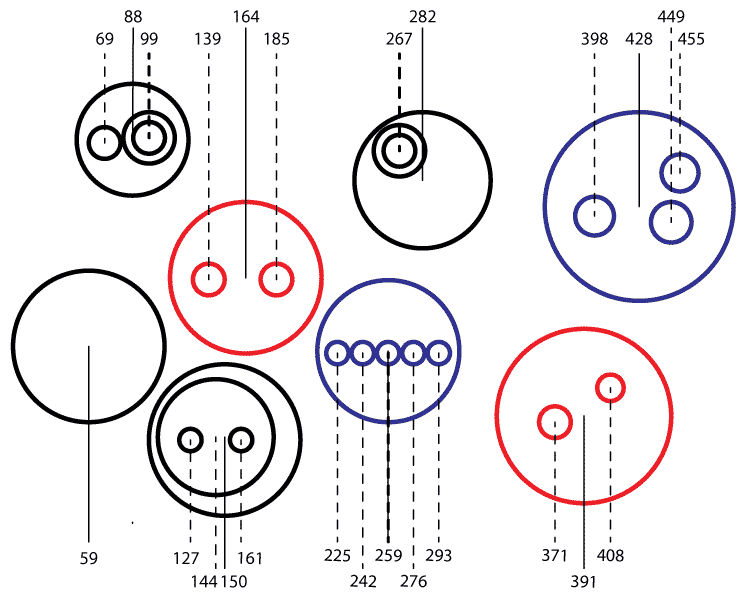

In [1]:
def vsebovanost(krogi):
    vsebuje = defaultdict(list)
    vsebovan_v = defaultdict(list)
    for krog0 in krogi:
        for krog1 in krogi:
            x0, y0, r0 = krog0
            x1, y1, r1 = krog1
            if r0 > r1 and (x1 - x0) ** 2 + (y1 - y0) ** 2 < r0 ** 2:
                vsebuje[krog0].append(krog1)
                vsebovan_v[krog1].append(krog0)
    return vsebuje, vsebovan_v

## Obvezni del

- `povrsina(krogi)` vrne skupno površino (= vsoto površin) vseh krogov.
- `vecjih_od(krogi, n)` vrne število krogov, katerih polmer je večji ali enak `n`.
- `sredisca_med(krogi, x0, y0, x1, y1)` vrne množico trojk (x, y, r), ki predstavljajo kroge, kateri središča ležijo znotraj pravokotnika, katerega levo gornje in desno spodnje oglišče sta (x0, y0) in (x1, y1). (Predpostaviti smeš x0 < y0 in x1 < y1).
- `naj_polmer(krogi)` vrne največji polmer kroga v seznamu `krogi`.

### Rešitev

#### `povrsina`

Površina je vsota `pi * r ** 2` za vsak `r` iz seznama krogov.

In [2]:
from math import pi

def povrsina(krogi):
    return sum(pi * r ** 2 for x, y, r in krogi)

Ne prezrite, da nismo pisali oglatih oklepajev. Funkciji `sum` lahko podamo tudi generator, zatorej ni potrebno sestavljati seznama.

Matematično nadarjeni opazijo še, da se da `pi` izpostaviti.

In [3]:
def povrsina(krogi):
    return pi * sum(r ** 2 for x, y, r in krogi)

#### `vecjih_od`

Sestavimo seznam polmerov, večjih od `n` in vrnemo število njegovih elementov.

In [4]:
def vecjih_od(krogi, n):
    return len([r for x, y, r in krogi if r >= n])

Namesto seznama polmerov bi lahko sestavili tudi seznam česarkoli drugega, recimo, seznam števil 42.

In [5]:
def vecjih_od(krogi, n):
    return len([42 for x, y, r in krogi if r >= n])

Bolj inspirirana je tale rešitev.

In [6]:
def vecjih_od(krogi, n):
    return sum(r >= n for x, y, r in krogi)

Sestavimo generator, ki vrača `True` za vsak polmer večji ali enak `n` in `False` za manjše. To seštejemo. Ker je `True` isto kot `1` in `False` isto kot `0`, bo `sum` vrnil število `True`-jev.

#### sredisca_med

Tole je podobno kot prej, le da naj bi vračali množico.

In [7]:
def sredisca_med(krogi, x0, y0, x1, y1):
    return {(x, y, r) for x, y, r in krogi if x0 <= x <= x1 and y0 <= y <= y1}

Poglejte pogoje: `x0 <= x <= x1`. V Pythonu lahko nizamo operatorje in ni potrebno pisati `x >= x0 and `x <= x1`.

#### naj_polmer

Zakaj sem dal najlažjo nalogo na konec?

In [8]:
def naj_polmer(krogi):
    return max(r for x, y, r in krogi)

## Dodatni del

- Pravilo je enako kot pred tremi tedni

    - Krog, ki vsebuje dva kroga, tadva pa ne vsebujeta drugih krogov, je ptič.
    - Krog, ki vsebuje več kot dva kroga, ki ne vsebujejo drugih krogov, je letalo.
    - Vsi ostali krogi so marsovci.

    Ta pravila se seveda nanašajo na zunanje kroge, torej kroge, ki niso vsebovani v nobenem drugem krogu.

    Napiši funkcije `ptici(krogi)`, `letala(krogi)` in `marsovci(krogi)`, ki vrnejo sezname koordinate središč vseh ptičev, letal in marsovskih ladij.
 
    Na začetku funkcije smeš poklicati `vsebovanost`, kot je že nakazano v datoteki s testi.

    Pred tremi tedni so testi sestavili velike sisteme krogov. Tokrat jih ne, torej ne bo prehudo, če bodo nekatere funkcije malo počasnejše.
    
### Rešitev

Krog je ptič, če 

- je zunanji (ne nastopa v `vsebovan_v`),
- vsebuje dva kroga (`krog in vsebuje and len(vsebuje[krog]) == 2`)
- in tadva, vsebovana kroga ne vsebujeta drugih krogov (ne nastopata v `vsebuje`).

In [9]:
def ptici(krogi):
    vsebuje, vsebovan_v = vsebovanost(krogi)
    return {krog[:2] for krog in krogi
            if krog not in vsebovan_v
            and krog in vsebuje and len(vsebuje[krog]) == 2
            and vsebuje[krog][0] not in vsebuje and vsebuje[krog][1] not in vsebuje}

Krog je letalo, če

- je zunanji (ne nastopa v vsebovan_v),
- vsebuje kaj krogov, vendar ne točno dveh (`krog in vsebuje and len(vsebuje[krog]) != 2`)
- za vse te, vsebovane kroga velja, da ne vsebujejo drugih krogov.

In [10]:
def letala(krogi):
    vsebuje, vsebovan_v = vsebovanost(krogi)
    return {krog[:2] for krog in krogi
            if krog not in vsebovan_v
            and krog in vsebuje and len(vsebuje[krog]) != 2
            and all(vkrog not in vsebuje for vkrog in vsebuje[krog])}

Krog je marsovec, če

- je zunanji
- ne vsebuje drugih krogv ali pa kateri od vsebovanih krogov vsebuje druge kroge.

In [11]:
def marsovci(krogi):
    vsebuje, vsebovani = vsebovanost(krogi)
    return {krog[:2] for krog in krogi
            if krog not in vsebovani and
            (krog not in vsebuje
             or any(vkrog in vsebuje for vkrog in vsebuje[krog]))}

## Še bolj dodatni del

Tole ni težko, morda je celo lažje od dodatnega dela.

Napiši funkciji

    - `notranji(krogi, krog)`, ki vrne množico krogov, ki se nahaja znotraj podanega.
    - `je_zunanji(krogi, krogi)`, ki pove (`True` ali `False`) ali je podani krog zunanji ali ne.

Za tidve funkciji ni testov. Pač pa se lahko, ko ju napišeš, znebiš funkcije `vsebovani` in iz funkcij `ptici`, `letala` in `krogi` kličeš tidve funkciji.

### Rešitev

In [12]:
def znotraj(krogi, krog):
    return {(x, y, r) for x, y, r in krogi
            if krog[2] > r and (x - krog[0]) ** 2 + (y - krog[1]) ** 2 < krog[2] ** 2}

def je_zunanji(krogi, krog):
    return not any(krog[2] < r and (x - krog[0]) ** 2 + (y - krog[1]) ** 2 < r ** 2 for x, y, r in krogi)
